# Análisis Exploratorio de Estadísticas Delictuales en Chile

**Autor:** Víctor Gavilán  
**LinkedIn:** [[Linkedin](https://www.linkedin.com/in/victorgavilan)]  
**GitHub:** [[Github](https://github.com/VictorGavilanR)]  

---

## Descripción general

Proyecto realizado como parte de mi proceso de aprendizaje en **Ciencia de Datos**, aplicando técnicas de **análisis exploratorio (EDA)**, **visualización de datos** con **Python**.

El dataset contiene las **estadísticas delictuales en Chile** registradas entre los años **2010 y 2023**.  
Analizaremos la evolución de los crímenes a lo largo del tiempo, los tipos de delitos más comunes y las variaciones 

---

## Objetivo del análisis

El propósito de este análisis es **comprender la estructura del conjunto de datos** sobre la evolución del crimen en Chile.

A través de este estudio busco responder preguntas como:
- ¿Qué tipos de delitos son más frecuentes?  
- ¿Cómo ha variado el número de robos y hurtos a lo largo de los años?  
- ¿En qué meses se registran más delitos?

---

# 1. Ajustes Iniciales

#### 1.1 Importación de Bibliotecas

In [1]:
# Trabajar con los datos

import pandas as pd
import numpy as np

# Visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga y Preprocesamiento del dataset

#### 2.1 Lectura del xlsx

In [2]:
# cargamos el dataframe
df = pd.read_excel('estadisticas-delictuales_Chile.xlsx')
df.head()

,AÑO,MES,Delitos de mayor connotación social,Homicidios,Hurtos,Lesiones leves,"Lesiones menos graves, graves o gravísimas",Otros robos con fuerza,Robo con violencia o intimidación,Robo de objetos de o desde vehículo,...,Abigeato,Abusos sexuales y otros delitos sexuales,Violencia intrafamiliar,Violencia intrafamiliar a adulto mayor,Violencia intrafamiliar a hombre,Violencia intrafamiliar a mujer,Violencia intrafamiliar a niño,Violencia intrafamiliar no clasificado,Receptación,Robo frustrado
0,2010,1,40515,28,9142,6723,1690,497,4114,4526,...,416,657,10727,136,1422,8618,468,83,24,584
1,2010,2,35654,19,8083,5433,1404,480,3568,3995,...,411,593,8706,116,1131,7020,373,66,33,443
2,2010,3,36699,18,7783,6527,1441,564,3447,4092,...,369,716,9518,140,1283,7552,482,61,47,493
3,2010,4,36708,15,8432,6248,1308,601,3587,4172,...,392,710,8472,124,1095,6778,405,70,25,488
4,2010,5,39964,14,9121,6189,1468,728,3844,4569,...,455,707,8696,123,1107,6955,452,59,33,555


#### 2.2 Preprocesamiento

**Eliminación del Columnas**
Se eliminarán columnas que entorpecen el análisis

In [3]:
columnas_agrupadas = [
    'Delitos de mayor connotación social',
    'Infracción a ley de armas',
    'Incivilidades',
    'Abigeato',
    'Abusos sexuales y otros delitos sexuales',
    'Violencia intrafamiliar'
]
# Guardarlas en un nuevo DataFrame
df_agrupados = df[columnas_agrupadas].copy()

# Eliminar esas columnas del dataset global
df = df.drop(columns=columnas_agrupadas)

print("Columnas eliminadas y guardadas aparte")
print("df global:", df.shape)
print("df_agrupados:", df_agrupados.shape)

Columnas eliminadas y guardadas aparte
df global: (162, 35)
df_agrupados: (162, 6)


**Eliminación de tildes**

Se quitaron los acentos para evitar errores al graficar

In [4]:
df = df.rename(columns={
    'Delitos de mayor connotación social' : 'Delitos de mayor connotacion social',
    'graves o gravísimas' : 'graves o gravisimas',
    'Robo con violencia o intimidación' : 'Robo con violencia o intimidacion',
    'Robo de objetos de o desde vehículo' : 'Robo de objetos de o desde vehiculo',
    'Robo de vehículo motorizado' : 'Robo de vehiculo motorizado',
    'Infracción a ley de armas' : 'Infraccion a ley de armas',
    'Consumo alcohol vía pública' : 'Consumo alcohol via publica',
    'Desórdenes' : 'Desordenes',
    'Riña pública' : 'Riña publica',
    'Receptación' : 'Receptacion'
})

**Formato a minusculas**

Todo en minúsculas para evitar errores.

In [5]:
df.columns = df.columns.str.lower()


**Resultado del dataframe procesado**

In [6]:
df.head()

,año,mes,homicidios,hurtos,lesiones leves,"lesiones menos graves, graves o gravísimas",otros robos con fuerza,robo con violencia o intimidacion,robo de objetos de o desde vehiculo,robo de vehiculo motorizado,...,otras incivilidades,riña publica,ruidos molestos,violencia intrafamiliar a adulto mayor,violencia intrafamiliar a hombre,violencia intrafamiliar a mujer,violencia intrafamiliar a niño,violencia intrafamiliar no clasificado,receptacion,robo frustrado
0,2010,1,28,9142,6723,1690,497,4114,4526,2270,...,2560,7,1099,136,1422,8618,468,83,24,584
1,2010,2,19,8083,5433,1404,480,3568,3995,2210,...,2238,8,872,116,1131,7020,373,66,33,443
2,2010,3,18,7783,6527,1441,564,3447,4092,2375,...,2263,5,962,140,1283,7552,482,61,47,493
3,2010,4,15,8432,6248,1308,601,3587,4172,2480,...,2684,6,849,124,1095,6778,405,70,25,488
4,2010,5,14,9121,6189,1468,728,3844,4569,2632,...,3132,10,928,123,1107,6955,452,59,33,555


# 3. Exploración inicial

**Dimensión del dataset**

El dataset cuenta con 162 filas y 35 columnas

In [7]:
print(f'El dataset cuenta con {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset cuenta con 162 filas y 35 columnas


**Comprobación del valores faltantes**

No hay rastro de valores faltantes, el dataset está equilibrado

In [8]:
df.isnull().sum().sum()

np.int64(0)

**Información general del dataset**

Todos los datos son de tipo numero, no hay valores nulos, los datos están completos

In [9]:
info_dataset = pd.DataFrame({
    'Tipo de Dato': df.dtypes,
    'Valores no nulos' : df.count(),
    'Valores nulos' : df.isna().sum(),
    'Valores únicos' : df.nunique()

})
info_dataset

,Tipo de Dato,Valores no nulos,Valores nulos,Valores únicos
año,int64,162,0,13
mes,int64,162,0,12
homicidios,int64,162,0,50
hurtos,int64,162,0,157
lesiones leves,int64,162,0,158
"lesiones menos graves, graves o gravísimas",int64,162,0,145
otros robos con fuerza,int64,162,0,134
robo con violencia o intimidacion,int64,162,0,158
robo de objetos de o desde vehiculo,int64,162,0,159
robo de vehiculo motorizado,int64,162,0,153


**Estimación de asimetría (Skewness) y Estimación del curtosis**

In [10]:
resumen = pd.DataFrame({
    'Asimetría (Skew)': df.select_dtypes(include='number').skew(),
    'Curtosis (Kurtosis)': df.select_dtypes(include='number').kurt()
})

# Función para interpretar skew
def interpretar_skew(x):
    if x > 1:
        return "Asimetría positiva fuerte (cola derecha)"
    elif x > 0.5:
        return "Asimetría positiva moderada"
    elif x > 0.1:
        return "Asimetría positiva leve"
    elif x < -1:
        return "Asimetría negativa fuerte (cola izquierda)"
    elif x < -0.5:
        return "Asimetría negativa moderada"
    elif x < -0.1:
        return "Asimetría negativa leve"
    else:
        return "Distribución simétrica"

# Función para interpretar kurtosis (Fisher)
def interpretar_kurt(x):
    if x > 1:
        return "Leptocúrtica (punta alta, más outliers)"
    elif x < -1:
        return "Platicúrtica (achatada, menos outliers)"
    else:
        return "Mesocúrtica (similar a normal)"

# Aplicar las interpretaciones
resumen['Interpretación Skew'] = resumen['Asimetría (Skew)'].apply(interpretar_skew)
resumen['Interpretación Kurtosis'] = resumen['Curtosis (Kurtosis)'].apply(interpretar_kurt)

# Mostrar tabla final
resumen.round(3)


,Asimetría (Skew),Curtosis (Kurtosis),Interpretación Skew,Interpretación Kurtosis
año,-0.061,-1.209,Distribución simétrica,"Platicúrtica (achatada, menos outliers)"
mes,0.049,-1.213,Distribución simétrica,"Platicúrtica (achatada, menos outliers)"
homicidios,1.117,0.759,Asimetría positiva fuerte (cola derecha),Mesocúrtica (similar a normal)
hurtos,-1.331,1.028,Asimetría negativa fuerte (cola izquierda),"Leptocúrtica (punta alta, más outliers)"
lesiones leves,0.575,-0.186,Asimetría positiva moderada,Mesocúrtica (similar a normal)
"lesiones menos graves, graves o gravísimas",0.589,-0.113,Asimetría positiva moderada,Mesocúrtica (similar a normal)
otros robos con fuerza,0.348,-0.316,Asimetría positiva leve,Mesocúrtica (similar a normal)
robo con violencia o intimidacion,0.498,0.351,Asimetría positiva leve,Mesocúrtica (similar a normal)
robo de objetos de o desde vehiculo,-1.081,0.681,Asimetría negativa fuerte (cola izquierda),Mesocúrtica (similar a normal)
robo de vehiculo motorizado,-0.750,-0.055,Asimetría negativa moderada,Mesocúrtica (similar a normal)


# 4. Análisis Univariado

#### 4.1 Estadísticas de cada columna

In [11]:
df.describe()

,año,mes,homicidios,hurtos,lesiones leves,"lesiones menos graves, graves o gravísimas",otros robos con fuerza,robo con violencia o intimidacion,robo de objetos de o desde vehiculo,robo de vehiculo motorizado,...,otras incivilidades,riña publica,ruidos molestos,violencia intrafamiliar a adulto mayor,violencia intrafamiliar a hombre,violencia intrafamiliar a mujer,violencia intrafamiliar a niño,violencia intrafamiliar no clasificado,receptacion,robo frustrado
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.111111,6.388889,29.259259,8339.296296,4272.376543,1109.043210,481.364198,4986.506173,4529.320988,2357.271605,...,3631.932099,11.450617,737.882716,207.401235,1275.407407,6769.333333,344.351852,189.919753,24.679012,631.876543
std,4.107258,3.460962,13.432858,1724.211253,1159.300255,191.464748,101.784253,994.751751,817.790719,379.892597,...,1238.209999,5.846964,434.632956,72.831505,216.061601,1013.135757,95.171599,161.919080,7.041716,159.342818
min,2010.000000,1.000000,10.000000,3636.000000,1965.000000,734.000000,270.000000,2842.000000,2147.000000,1264.000000,...,1735.000000,1.000000,0.000000,97.000000,882.000000,4640.000000,121.000000,32.000000,9.000000,360.000000
25%,2013.000000,3.000000,20.000000,7878.500000,3495.750000,964.250000,408.500000,4232.250000,4209.000000,2157.250000,...,2938.750000,8.000000,394.000000,157.000000,1132.250000,5946.000000,267.250000,72.000000,19.000000,510.250000
50%,2016.000000,6.000000,26.000000,8861.500000,4062.500000,1079.000000,473.000000,4924.000000,4686.000000,2446.500000,...,3180.500000,10.000000,890.000000,179.000000,1241.000000,6708.000000,355.000000,109.000000,24.000000,592.500000
75%,2020.000000,9.000000,35.000000,9517.750000,4959.250000,1227.500000,552.750000,5653.000000,5107.250000,2629.250000,...,3846.000000,14.000000,1050.750000,234.250000,1364.750000,7317.750000,414.750000,263.000000,29.000000,732.750000
max,2023.000000,12.000000,73.000000,10738.000000,7101.000000,1690.000000,733.000000,8196.000000,5851.000000,3037.000000,...,9165.000000,35.000000,1325.000000,418.000000,1975.000000,9388.000000,541.000000,643.000000,47.000000,1192.000000


### 4.2 Análisis univariado: Top 5 delitos más frecuentes

En este paso se realizó un **análisis univariado** para identificar los delitos con mayor cantidad total de casos registrados entre **2010 y 2023**.  
Luego de eliminar las columnas agrupadas que concentraban distintas categorías, se ordenaron los delitos individuales según su frecuencia total para observar con mayor precisión su peso dentro del conjunto de datos.

El gráfico de barras muestra el **Top 5 de delitos más comunes en Chile** durante el período analizado:

1. **Consumo de alcohol en la vía pública** — con aproximadamente **1.575.889 casos**, es el delito más frecuente del período.  
   Este tipo de infracción pertenece a las denominadas *incivilidades*, y refleja comportamientos sociales que, aunque no siempre violentos, afectan el orden público y la convivencia ciudadana.

2. **Daños** — con **1.519.251 casos**, representa actos de deterioro o destrucción de bienes materiales, tanto públicos como privados.  
   Su alta frecuencia puede asociarse a conflictos urbanos y manifestaciones sociales.

3. **Amenazas** — con **1.506.894 registros**, corresponde a acciones de intimidación o coacción hacia otras personas.  
   Este delito muestra una incidencia sostenida en los últimos años, muchas veces ligada a conflictos interpersonales o familiares.

4. **Hurtos** — con **1.350.966 casos**, engloba el robo sin violencia ni intimidación.  
   Es uno de los delitos patrimoniales más comunes y suele estar vinculado a espacios públicos o comercios.

5. **Violencia intrafamiliar hacia la mujer** — con **1.096.632 registros**, se mantiene entre los delitos más graves y persistentes del país.  
   Este indicador pone en evidencia una problemática social profunda relacionada con la violencia de género en el ámbito doméstico.

---

### Proporción de los principales delitos

El gráfico de pastel complementario muestra la **participación porcentual** de estos cinco delitos respecto del total general de registros.  
Se aprecia que el **consumo de alcohol en la vía pública** concentra la mayor proporción, seguido muy de cerca por los delitos de **daños** y **amenazas**, que en conjunto representan una parte significativa de los casos registrados en Chile entre 2010 y 2023.

Esta distribución permite dimensionar la magnitud de las **incivilidades y delitos contra la propiedad**, los cuales dominan el panorama delictual nacional en términos de volumen, aunque no necesariamente en gravedad.



In [12]:
delitos = df.drop(columns=['año', 'mes'])


totales = delitos.sum().sort_values(ascending=False)
totales.head(5)


consumo alcohol via publica        1575889
daños                              1519251
amenazas                           1506894
hurtos                             1350966
violencia intrafamiliar a mujer    1096632
dtype: int64

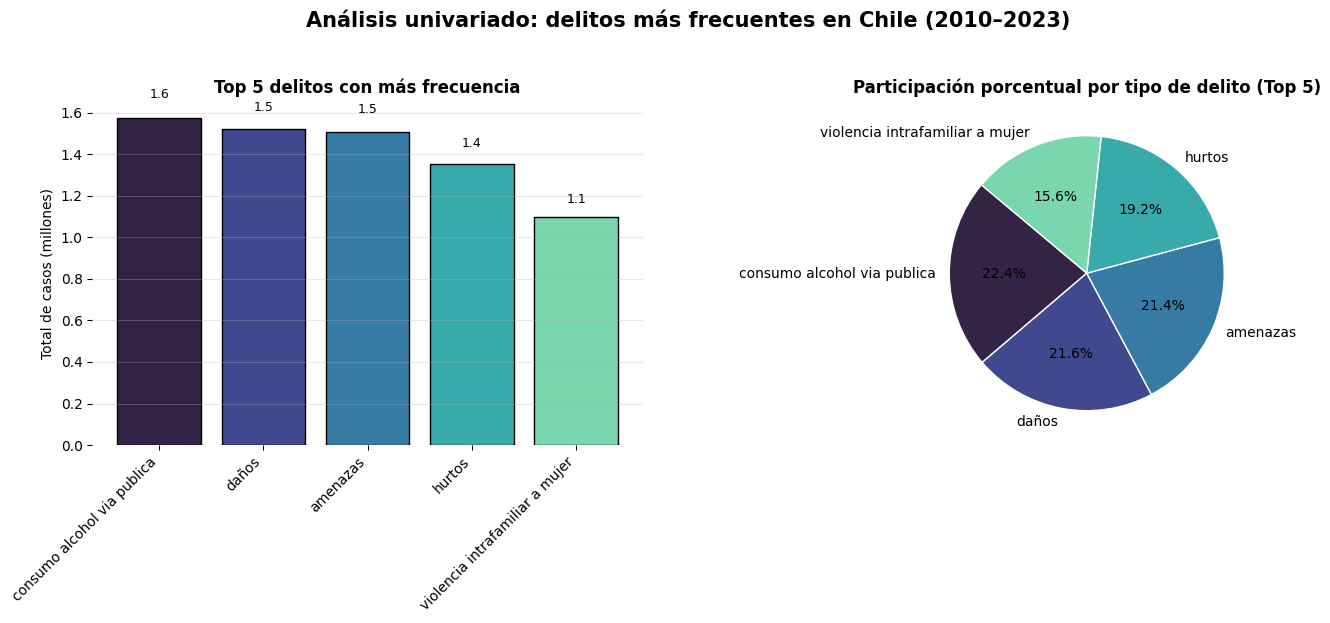

In [13]:
# Datos base
top_5 = totales.head(5)
top_5_millones = top_5 / 1_000_000

porcentajes = (totales / totales.sum()) * 100
top10 = porcentajes.head(5).reset_index()
top10.columns = ['Delito', 'Porcentaje']

palette = sns.color_palette("mako", n_colors=5)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Análisis univariado: delitos más frecuentes en Chile (2010–2023)", 
             fontsize=15, fontweight='bold', y=1.03)

# --- Gráfico 1: barras ---
axes[0].bar(top_5_millones.index, top_5_millones.values, color=palette, edgecolor='black', linewidth=1)
axes[0].set_title('Top 5 delitos con más frecuencia', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total de casos (millones)')
axes[0].set_xticks(range(len(top_5_millones.index)))
axes[0].set_xticklabels(top_5_millones.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Etiquetas encima de cada barra
for i, v in enumerate(top_5_millones.values):
    axes[0].text(i, v + (v * 0.05), f"{v:.1f}", ha='center', va='bottom', fontsize=9, color='black')

# --- Gráfico 2: pie ---
axes[1].pie(
    top10['Porcentaje'],
    labels=top10['Delito'],
    autopct='%1.1f%%',
    startangle=140,
    colors=palette,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Participación porcentual por tipo de delito (Top 5)", fontsize=12, fontweight='bold')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


#### 4.3 Análisis Univariado: Distribución temporal (Años / Meses)


Se puede observar que en el año **2010** se registró el **mayor número de delitos**, superando los **24 millones de casos** a nivel nacional.  
A partir de ese año, la cantidad total de registros presenta una **disminución considerable**, manteniéndose luego en valores más **estables y homogéneos**, en torno a los **12 a 13 millones de casos anuales**.  

Este comportamiento sugiere una posible **corrección o ajuste en la forma de registro de datos** después de 2010, o bien una reducción real en la cantidad de denuncias y delitos reportados.  
De todos modos, la tendencia posterior muestra un **comportamiento equilibrado** sin grandes picos, lo que refleja cierta estabilidad en los niveles delictuales durante el período analizado.

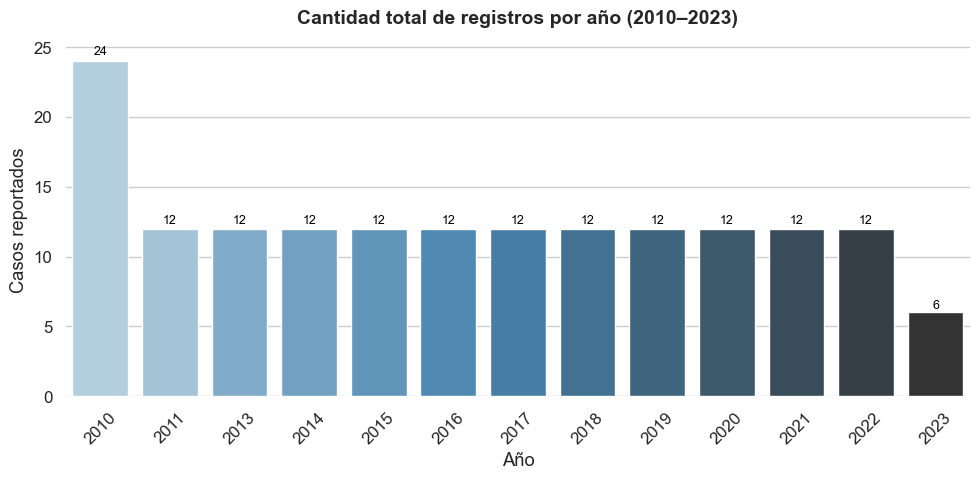

In [14]:

# Configurar estilo general
sns.set(style="whitegrid", font_scale=1.1)

# Calcular total de delitos por año
total_por_año = df['año'].value_counts().sort_index()

# Crear gráfico
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=total_por_año.index,
    y=total_por_año.values,
    hue=total_por_año.index,
    palette="Blues_d",
    legend=False
)
# Títulos y etiquetas
plt.title("Cantidad total de registros por año (2010–2023)", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Año")
plt.ylabel("Casos reportados")
plt.xticks(rotation=45)

# Etiquetas encima de cada barra
for i, v in enumerate(total_por_año.values):
    plt.text(i, v + (v * 0.01), f"{v:,.0f}", ha='center', va='bottom', fontsize=9, color='black')

# Ajustes visuales
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# 5 Análisis Bivariado

### 4.3 Análisis bivariado: Evolución temporal de los principales delitos (2010–2023)

En esta etapa se realiza un **análisis bivariado**, comparando el comportamiento de los principales delitos identificados en el análisis univariado con respecto al tiempo (variable “Año”).  
El objetivo es observar **tendencias, aumentos o disminuciones** en la frecuencia de cada delito a lo largo del período 2010–2023.

El gráfico de líneas muestra cómo ha variado el número de casos registrados para los cinco delitos más comunes:

- **Consumo de alcohol en la vía pública:** destaca por mantener el mayor volumen de casos en la mayoría de los años. Presenta una **fuerte caída entre 2010 y 2011**, seguida de un **comportamiento más estable** con ligeros repuntes en 2017–2018 y una disminución posterior.  
- **Daños, Amenazas y Hurtos:** muestran trayectorias bastante similares, con una **reducción pronunciada después de 2010**, y un nivel relativamente **constante desde 2014 en adelante**.  
  En los últimos años (2021–2023) se aprecia un **ligero repunte**, posiblemente relacionado con el retorno de la actividad social tras la pandemia.  
- **Violencia intrafamiliar hacia la mujer:** mantiene un patrón distinto, con **menor magnitud absoluta** pero una **tendencia más estable**, sin descensos abruptos. Esto refleja su carácter persistente como problema estructural de la sociedad chilena.

---

### Conclusiones parciales

Se puede observar que los delitos asociados a **incivilidades y daños materiales** presentan una fuerte disminución inicial, lo que podría deberse a **ajustes en los registros o campañas de control** posteriores al año 2010.  
En contraste, la **violencia intrafamiliar** se mantiene constante, lo que sugiere que no responde tanto a factores estacionales o coyunturales, sino a **dinámicas sociales más profundas**.

En general, la evolución muestra una **tendencia descendente y estabilizada** en los delitos más frecuentes, con pequeños repuntes en años específicos que podrían investigarse con variables contextuales (por ejemplo, eventos sociales o crisis económicas).


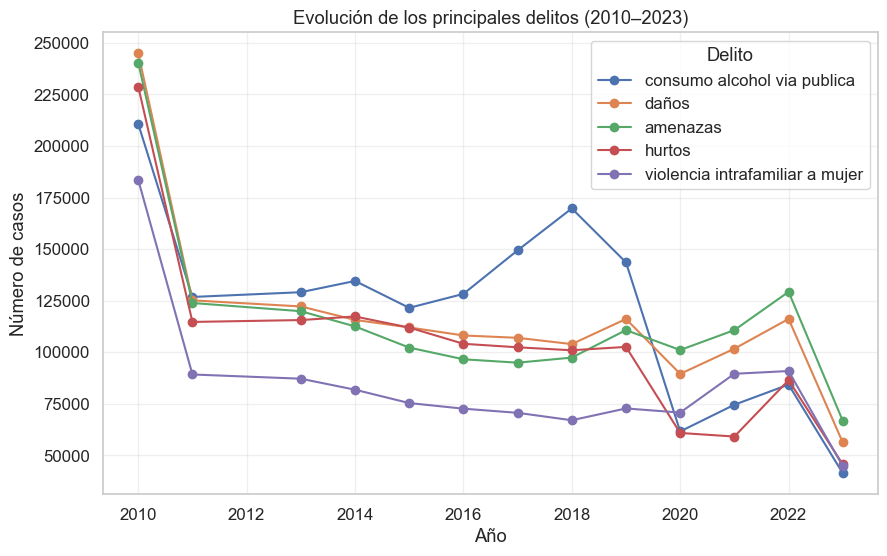

In [15]:
delitos_top5 = top_5.index  # usa los mismos que graficaste
evolucion = df.groupby('año')[delitos_top5].sum()

evolucion.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Evolución de los principales delitos (2010–2023)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.grid(alpha=0.3)
plt.legend(title='Delito')
plt.show()

### 4.4 Análisis bivariado: Estacionalidad de los principales delitos (2010–2023)

En este análisis se observa la **variación mensual** de los cinco delitos más frecuentes, con el objetivo de detectar **patrones estacionales** o comportamientos comunes a lo largo del año.

El gráfico evidencia que, pese a las diferencias en magnitud, los delitos tienden a **moverse de manera sincronizada**: cuando uno aumenta o disminuye, los demás suelen seguir una **trayectoria similar**.  
Esto sugiere la existencia de **factores estacionales o contextuales compartidos**, como festividades, vacaciones, condiciones climáticas o mayor actividad social en ciertos periodos del año.

El **consumo de alcohol en la vía pública** muestra los valores más altos en casi todos los meses, con ligeros picos en **verano (enero–febrero)**, lo que coincide con periodos de mayor recreación y eventos masivos.  
Los delitos de **daños, amenazas y hurtos** presentan curvas más moderadas, pero siguen un **patrón comparable**, con alzas en los mismos meses donde sube el consumo de alcohol.  
Por otro lado, la **violencia intrafamiliar hacia la mujer** mantiene un comportamiento más **constante y lineal**, sin picos tan pronunciados, lo que indica una presencia estable del fenómeno durante todo el año.

En conjunto, la tendencia general demuestra que los delitos en Chile poseen una **componente estacional moderada**, influenciada por la actividad social y el contexto temporal, más que por variaciones aleatorias.


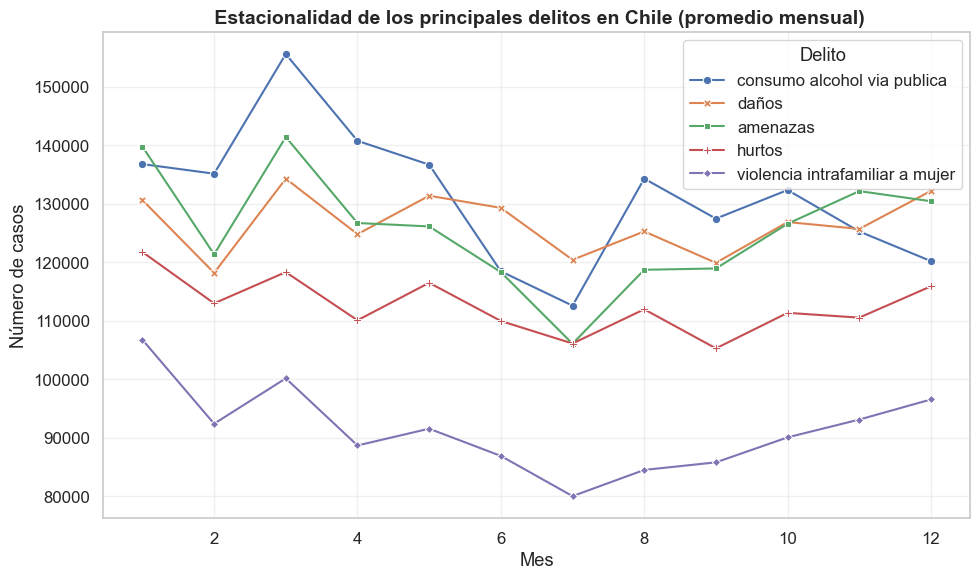

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de los 5 delitos principales que ya identificaste
delitos_top5 = [
    'consumo alcohol via publica',
    'daños',
    'amenazas',
    'hurtos',
    'violencia intrafamiliar a mujer'
]

# Agrupar por mes y sumar cada delito
delitos_mes = df.groupby('mes')[delitos_top5].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
sns.lineplot(data=delitos_mes, markers=True, dashes=False)

plt.title(' Estacionalidad de los principales delitos en Chile (promedio mensual)', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Número de casos')
plt.grid(alpha=0.3)
plt.legend(title='Delito')
plt.tight_layout()
plt.show()


### 4.5 Análisis bivariado: correlación entre los principales delitos (2010–2023)

El gráfico muestra la **matriz de correlación** entre los cinco delitos más frecuentes en Chile, considerando el periodo 2010–2023.  
El objetivo de este análisis es identificar si existe alguna relación directa entre el comportamiento de estos delitos a lo largo del tiempo.

Los resultados reflejan que:

- Existe una **alta correlación positiva** entre **Amenazas**, **Daños** y **Violencia intrafamiliar hacia la mujer**, con valores que superan **0.70** y **0.80**.  
  Esto sugiere que estos tipos de delitos **tienden a aumentar y disminuir en conjunto**, posiblemente debido a factores sociales comunes como conflictos interpersonales o tensiones dentro del hogar.  
- El **Hurtos** muestra una correlación **moderada** con varios delitos (especialmente **Daños** y **Amenazas**), lo que indica que su frecuencia puede verse influida por los mismos contextos urbanos o económicos.  
- En cambio, el **Consumo de alcohol en vía pública** presenta correlaciones bajas o negativas con los demás, reflejando que este delito sigue **una dinámica distinta**, más relacionada con factores estacionales o recreativos.

En conjunto, el análisis sugiere que los delitos de carácter **social y relacional** (Amenazas, Daños y Violencia intrafamiliar) muestran un comportamiento estrechamente vinculado, mientras que los **delitos de convivencia pública** (como el consumo de alcohol en la vía pública) operan bajo patrones independientes.


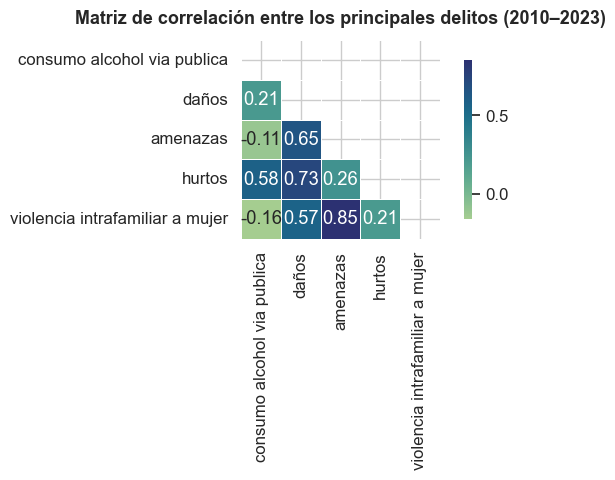

In [17]:

# Seleccionar los delitos principales
delitos_top5 = [
    'consumo alcohol via publica',
    'daños',
    'amenazas',
    'hurtos',
    'violencia intrafamiliar a mujer'
]

# Calcular la matriz de correlación
corr = df[delitos_top5].corr()

# Crear una máscara para ocultar el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear el mapa de calor
plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    mask=mask,           # aplica la máscara
    annot=True,          # muestra los valores numéricos
    cmap='crest',        # paleta de colores moderna
    fmt=".2f",           # formato de los números
    linewidths=0.5,      # líneas entre celdas
    square=True,         # celdas cuadradas
    cbar_kws={"shrink": 0.8}
)

plt.title('Matriz de correlación entre los principales delitos (2010–2023)', fontsize=13, fontweight='bold', pad=12)
plt.tight_layout()
plt.show()

# 5. Conclusiones finales

Tras analizar las estadísticas delictuales en Chile entre 2010 y 2023, se pueden destacar las siguientes conclusiones:

1. Los **delitos de incivilidad**, especialmente el *consumo de alcohol en vía pública*, son los más frecuentes del país, con más de 1,5 millones de casos en el período analizado.
2. A nivel temporal, se observa una **reducción significativa de casos tras 2010**, seguida por una estabilización general y ligeros repuntes en algunos años (2018 y 2022).
3. Los **delitos de carácter interpersonal** como *amenazas*, *daños* y *violencia intrafamiliar hacia la mujer* muestran una **alta correlación**, lo que sugiere que comparten causas sociales o contextuales similares.
4. Los análisis mensuales revelan un **patrón estacional moderado**, con mayor incidencia en los meses de verano, posiblemente asociado a la actividad social y al consumo de alcohol.
5. En general, el comportamiento delictual presenta una **tendencia descendente** en la última década, aunque persisten problemas estructurales vinculados a la violencia intrafamiliar y a la convivencia ciudadana.

Estos resultados permiten orientar futuras investigaciones hacia la identificación de **factores socioeconómicos o culturales** que inciden en la criminalidad, así como diseñar políticas públicas de **prevención focalizada**.
